In [1]:
# Import Packages
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import statsmodels.api as sm
from scipy import stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Processing the data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
# scaler = StandardScaler().fit(X_train) >>> standardized_X = scaler.transform(X_train) >>> standardized_X_test = scaler.transform(X_test
from sklearn.preprocessing import Normalizer
# scaler = Normalizer().fit(X_train) >>> normalized_X = scaler.transform(X_train) >>> normalized_X_test = scaler.transform(X_test)
from sklearn.preprocessing import Binarizer 
# binarizer = Binarizer(threshold=0.0).fit(X) >>> binary_X = binarizer.transform(X)

# Encoding Categorical Features
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# enc = LabelEncoder()
# y = enc.fit_transform(y)
from sklearn.impute import (SimpleImputer, KNNImputer, MissingIndicator)
from sklearn.experimental import enable_iterative_imputer
# imp = Imputer(missing_values=0, strategy='mean', axis=0) >>> imp.fit_transform(X_train)
from sklearn.preprocessing import PolynomialFeatures 
# poly = PolynomialFeatures(5) >>> poly.fit_transform(X)

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)


# Various Models
from sklearn.cluster import KMeans
# k_means = KMeans(n_clusters=3, random_state=0

from sklearn.decomposition import PCA
# pca = PCA(n_components=0.95)

from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
from sklearn.linear_model import RidgeCV
# rrm = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), normalize=True)

from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
from sklearn.svm import SVC 
# svc = SVC(kernel='linear')
from sklearn.linear_model import LinearRegression
# lr = LinearRegression(normalize=True)
from sklearn import neighbors
# knn = neighbors.KNeighborsClassifier(n_neighbors=5)

## Fit the model
# # Supervised learning
# lr.fit(X, y)
# knn.fit(X_train, y_train)
# svc.fit(X_train, y_train)   

# #Unsupervised Learning 
# k_means.fit(X_train) 
# pca_model = pca.fit_transform(X_train)

## Predict Y
# Supervised Estimators
# y_pred = svc.predict(np.random.random((2,5))) 
# y_pred = lr.predict(X_test)
# y_pred = knn.predict_proba(X_test)   
# Unsupervised Estimators 
# y_pred = k_means.predict(X_test)


# Packages to evaluate Model Performance (Classification)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report 
# print(classification_report(y_test_log, y_pred_log))

# Packages to evaluate Model Performance (Linear)
from sklearn.metrics import mean_absolute_error 
# y_true = [3, -0.5, 2] >>> mean_absolute_error(y_true, y_pred)
from sklearn.metrics import mean_squared_error
# mean_squared_error(y_test, y_pred)
from sklearn.metrics import r2_score 
# r2_score(y_true, y_pred)

#from sklearn.cross_validation import cross_val_score 
# print(cross_val_score(knn, X_train, y_train, cv=4)) >>> print(cross_val_score(lr, X, y, cv=2)


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss 

In [4]:
# Pull in QB data
df1 = pd.read_csv('passing_data.csv', na_values=r'-')

In [5]:
df1.head()

Player_num    player team   YAR   DVOA    VOA   QBR  pass  yards  Eyds  \
0           1  A.Dalton  CIN    75 -0.086 -0.090  41.1   536   3061  2894   
1           2  A.Dalton  CIN   406  0.052  0.053  59.4   383   2405  2543   
2           3  A.Dalton  CIN   -63 -0.106 -0.129  40.1   558   3230  2934   
3           4  A.Dalton  CIN   667  0.076  0.058  52.3   605   3915  4165   
4           5  A.Dalton  CIN  1059  0.317  0.289  72.5   409   3103  3676   

   ...  FL  INT  comp_perc  ALEX  year  completions  yds_per_comp  \
0  ...   4   12       0.60   2.2  2017          323           9.5   
1  ...   0   10       0.62   1.1  2018          239          10.1   
2  ...   4   14       0.60   1.2  2019          337           9.6   
3  ...   2    8       0.65   0.8  2016          393          10.0   
4  ...   2    7       0.66   1.9  2015          270          11.5   

   DYAR_per_comp  Eyds_per_comp  DYAR  
0            0.3            9.0    87  
1            1.7           10.6   404  
2            0.1            8.7    19  
3            1.9           10.6   738  
4            4.2           13.6  1135  

[5 rows x 22 columns]

In [6]:
# Describe the Data
df1.describe()

Player_num          YAR        DVOA         VOA         QBR  \
count  612.000000   612.000000  612.000000  612.000000  612.000000   
mean   306.500000   221.991830   -0.114255   -0.119665   46.736928   
std    176.813461   529.464694    0.336103    0.341256   19.599301   
min      1.000000 -1067.000000   -2.207000   -2.205000    0.000000   
25%    153.750000  -102.500000   -0.244250   -0.260000   32.700000   
50%    306.500000    27.500000   -0.081500   -0.079500   48.650000   
75%    459.250000   466.250000    0.081000    0.076000   61.000000   
max    612.000000  2674.000000    1.364000    1.468000   99.600000   

             pass        yards         Eyds          TD          FK  \
count  612.000000   612.000000   612.000000  612.000000  612.000000   
mean   309.160131  1939.756536  1903.197712   12.787582    1.767974   
std    228.552673  1541.200900  1736.277579   11.642548    1.768543   
min     10.000000     9.000000  -280.000000    0.000000    0.000000   
25%     78.750000   420.500000   302.000000    2.000000    0.000000   
50%    289.500000  1656.000000  1395.500000   10.000000    1.000000   
75%    531.250000  3372.750000  3374.000000   21.250000    3.000000   
max    753.000000  5347.000000  7040.000000   55.000000    9.000000   

               FL         INT   comp_perc        ALEX         year  \
count  612.000000  612.000000  612.000000  612.000000   612.000000   
mean     1.591503    7.197712    0.609346    1.137582  2014.424837   
std      1.674824    5.614028    0.073118    2.455541     2.891814   
min      0.000000    0.000000    0.110000  -11.000000  2010.000000   
25%      0.000000    2.000000    0.580000    0.000000  2012.000000   
50%      1.000000    6.000000    0.610000    1.200000  2014.000000   
75%      2.000000   11.250000    0.650000    2.300000  2017.000000   
max      8.000000   29.000000    0.910000   14.100000  2019.000000   

       completions  yds_per_comp  DYAR_per_comp  Eyds_per_comp         DYAR  
count   612.000000    612.000000     612.000000     612.000000   612.000000  
mean    193.580065      9.690196      -0.295425       8.220098   221.906863  
std     148.028092      2.655280       4.091032       4.817026   531.846063  
min       1.000000      0.900000     -36.400000     -23.700000 -1145.000000  
25%      46.750000      8.800000      -1.500000       6.800000  -103.250000  
50%     173.000000      9.800000       0.300000       8.950000    29.500000  
75%     331.000000     10.500000       1.925000      11.000000   448.000000  
max     493.000000     57.300000      12.800000      24.500000  2475.000000

In [7]:
# More info on data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 22 columns):
Player_num       612 non-null int64
player           612 non-null object
team             612 non-null object
YAR              612 non-null int64
DVOA             612 non-null float64
VOA              612 non-null float64
QBR              612 non-null float64
pass             612 non-null int64
yards            612 non-null int64
Eyds             612 non-null int64
TD               612 non-null int64
FK               612 non-null int64
FL               612 non-null int64
INT              612 non-null int64
comp_perc        612 non-null float64
ALEX             612 non-null float64
year             612 non-null int64
completions      612 non-null int64
yds_per_comp     612 non-null float64
DYAR_per_comp    612 non-null float64
Eyds_per_comp    612 non-null float64
DYAR             612 non-null int64
dtypes: float64(8), int64(12), object(2)
memory usage: 105.3+ KB


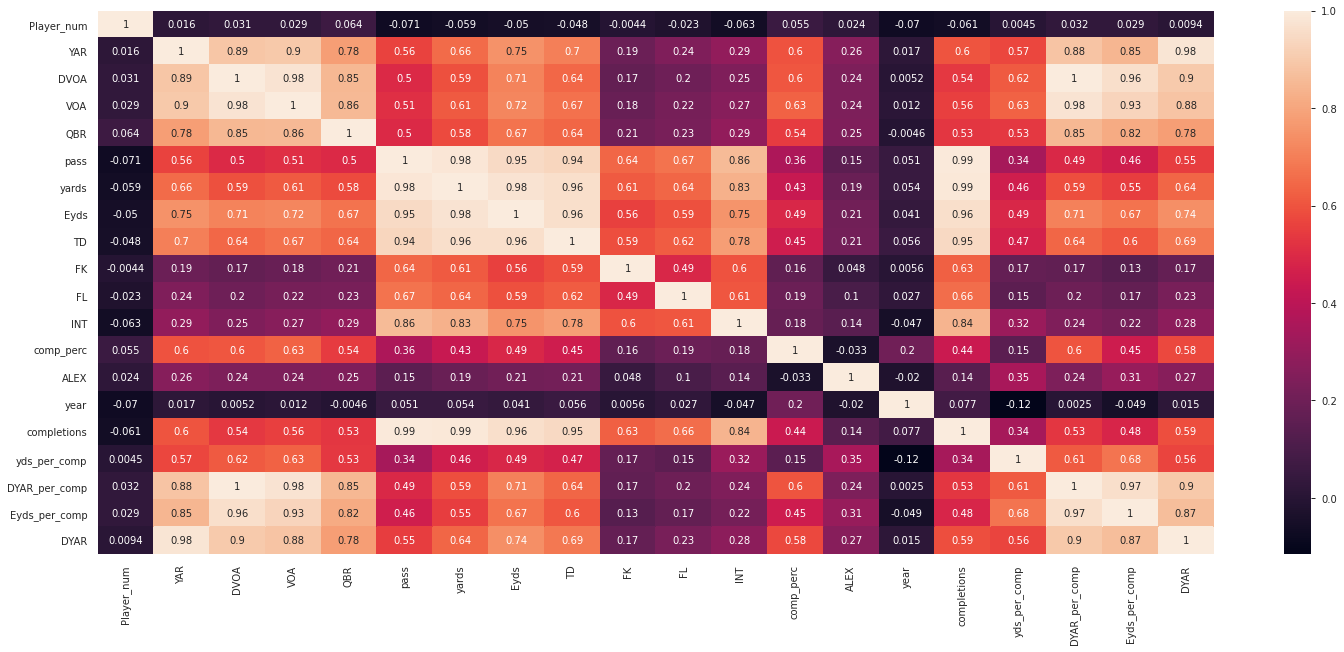

In [8]:
# Correlation Heatmap for the data
spearman =df1.corr(method ='spearman')
plt.figure(figsize=(25,10))
sns.heatmap(spearman, annot=True)

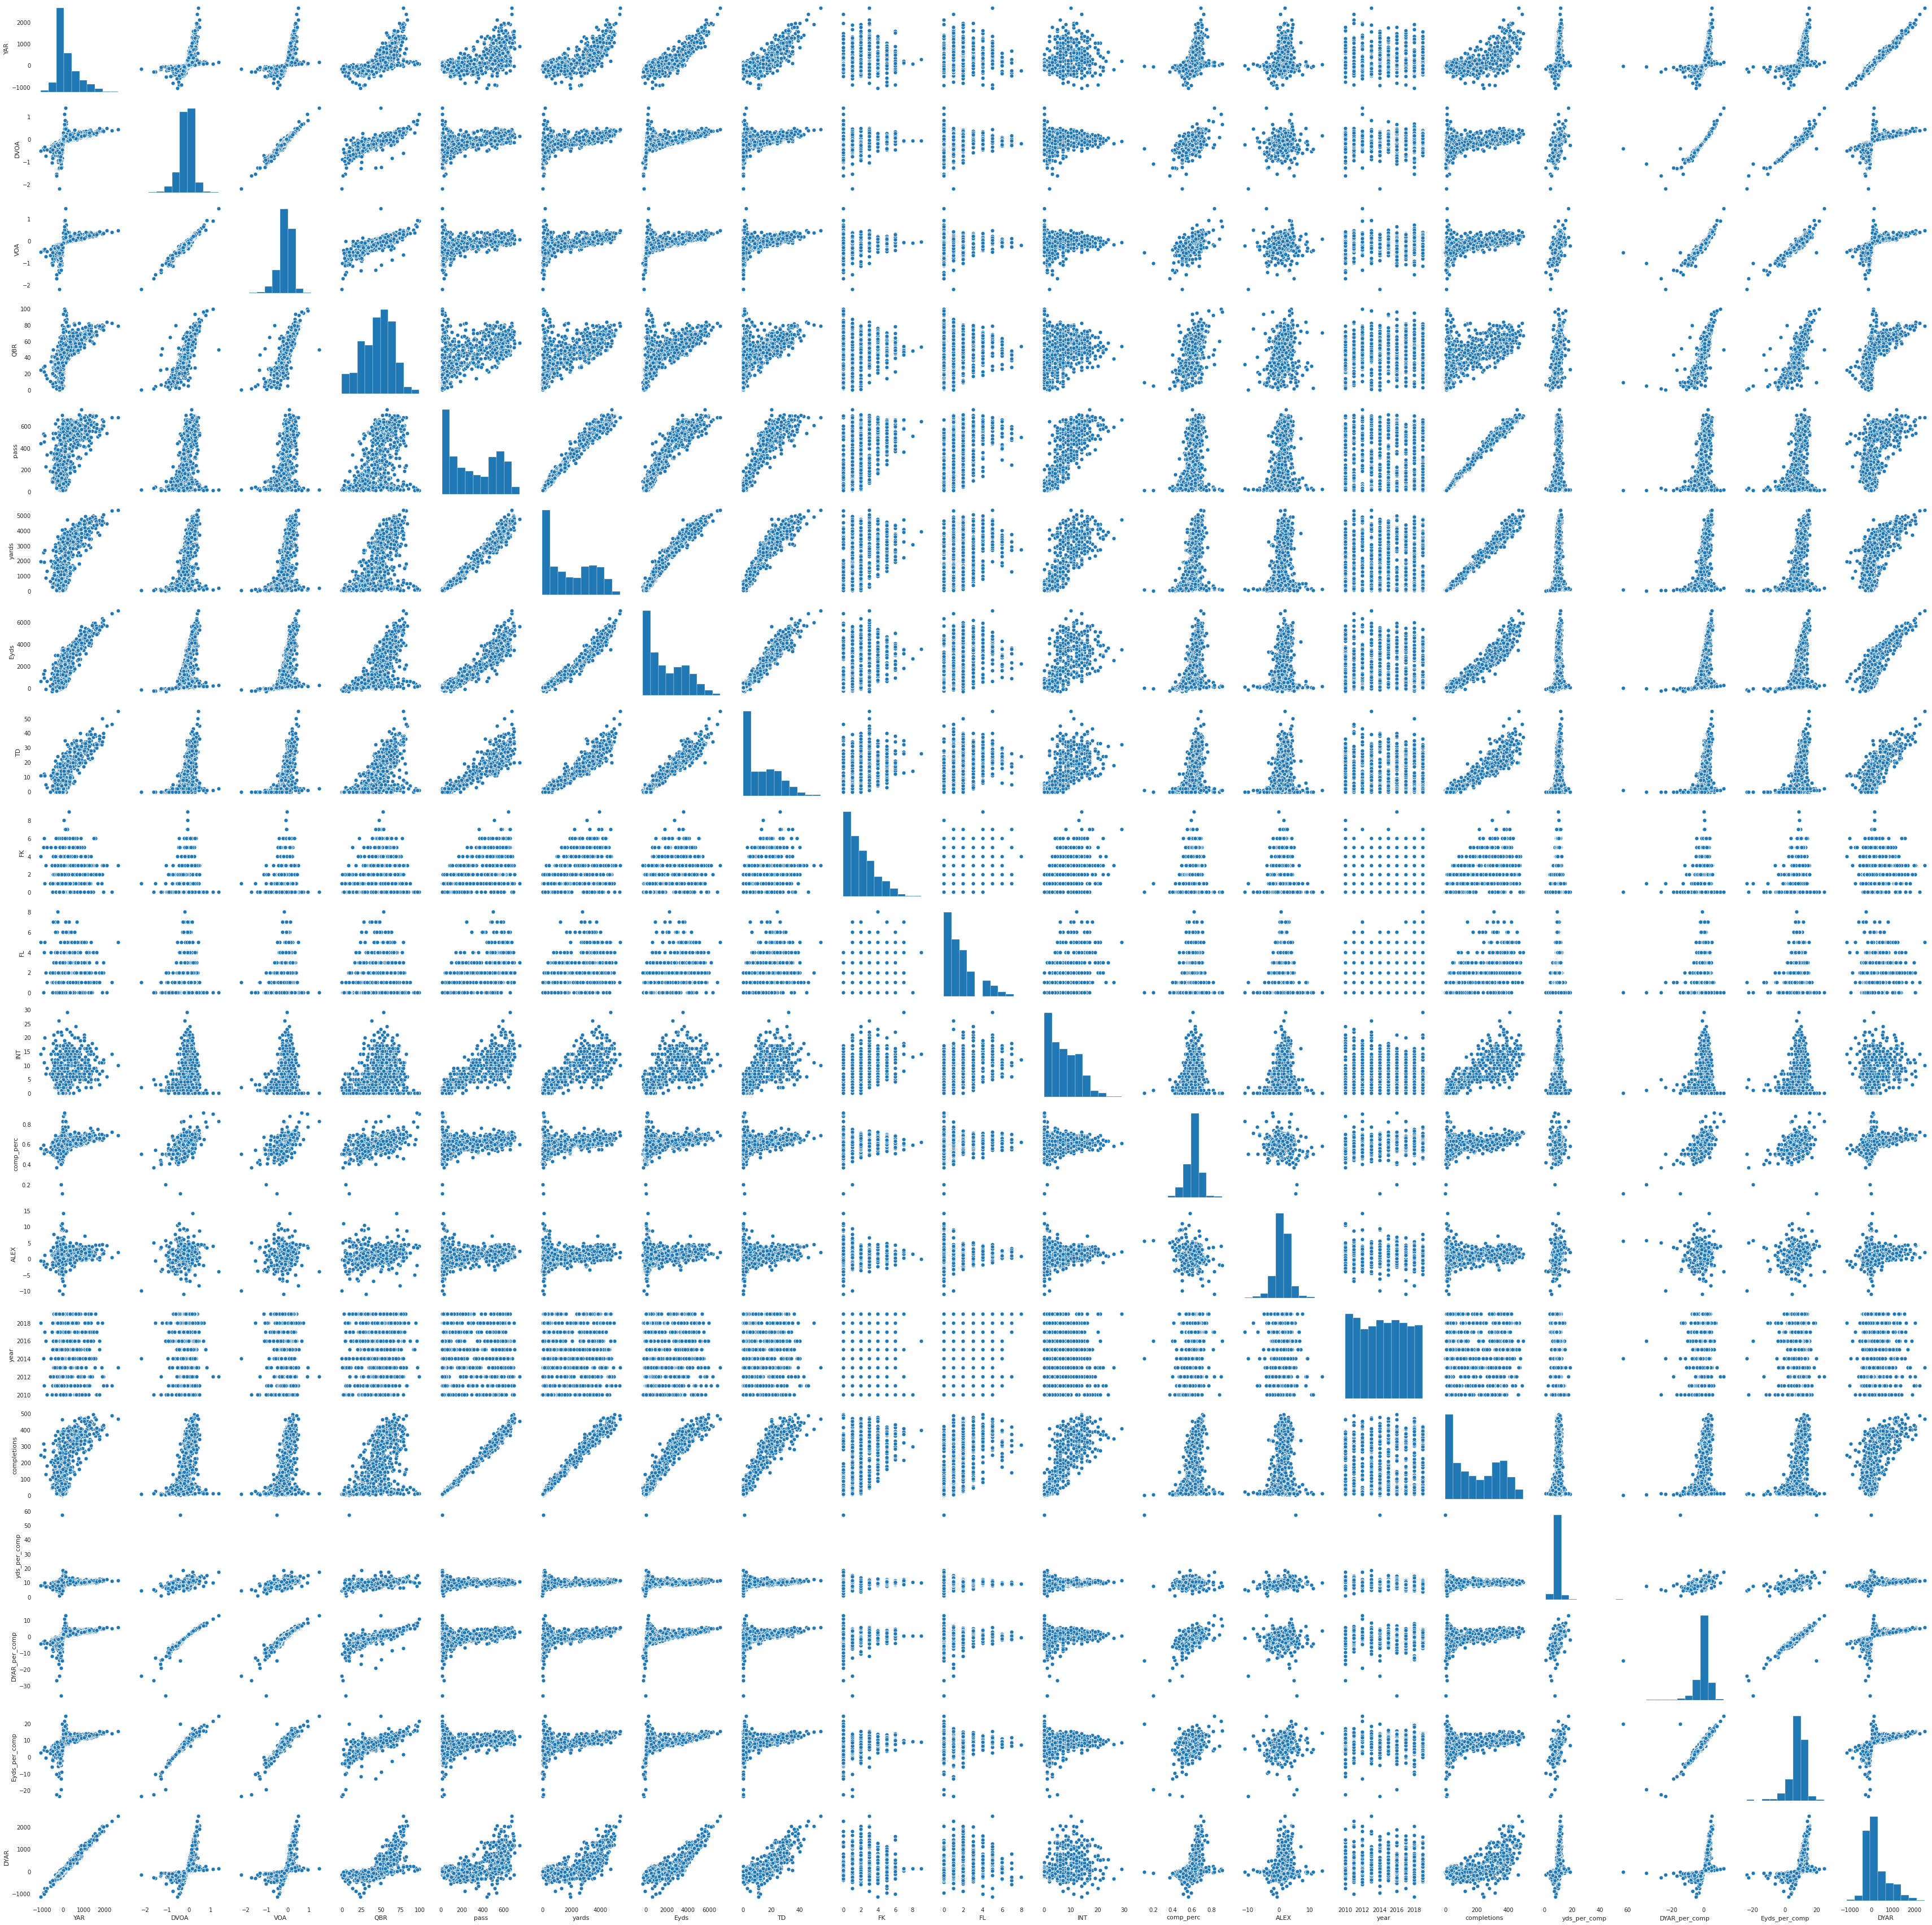

In [9]:
numerical_list=['YAR','DVOA','VOA','QBR','pass','yards','Eyds','TD','FK','FL','INT','comp_perc','ALEX','year','completions','yds_per_comp','DYAR_per_comp','Eyds_per_comp','DYAR']
sns.pairplot(df1[numerical_list])

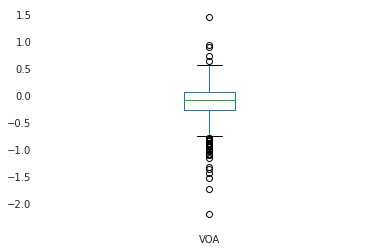

In [12]:
# Add Box Plots to further Describe the Data
# For QBR
df_p=df1.iloc[:,5]
df_p.plot.box()

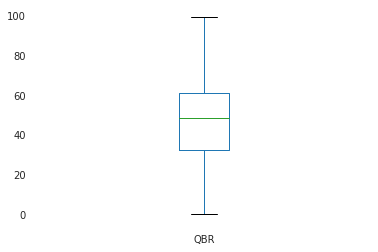

In [13]:
# Add Box Plots to further Describe the Data
# For pass
df_p=df1.iloc[:,6]
df_p.plot.box()

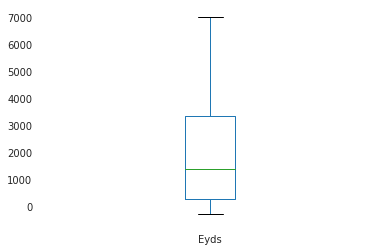

In [14]:
# Add Box Plots to further Describe the Data
# For TD
df_p=df1.iloc[:,9]
df_p.plot.box()

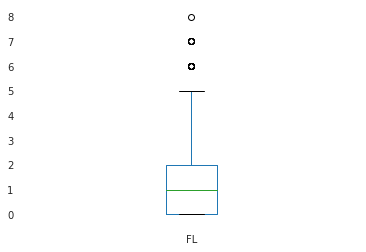

In [15]:
# Add Box Plots to further Describe the Data
# For int
df_p=df1.iloc[:,12]
df_p.plot.box()

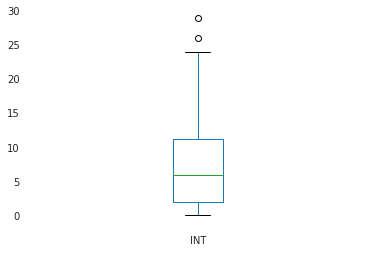

In [16]:
# Add Box Plots to further Describe the Data
# For comp_perc
df_p=df1.iloc[:,13]
df_p.plot.box()

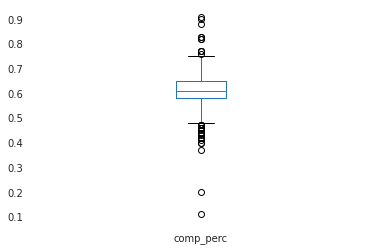

In [17]:
# Add Box Plots to further Describe the Data
# For ALEX
df_p=df1.iloc[:,14]
df_p.plot.box()

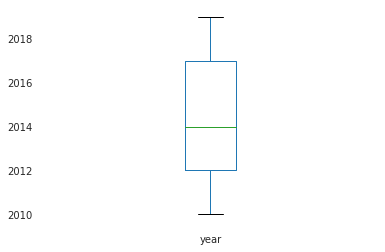

In [18]:
# Add Box Plots to further Describe the Data
# For completions
df_p=df1.iloc[:,16]
df_p.plot.box()

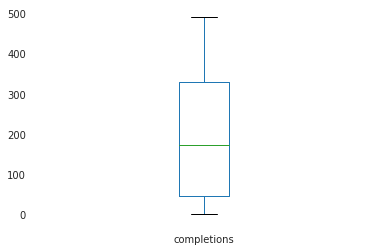

In [19]:
# Add Box Plots to further Describe the Data
# For yds_per_comp
df_p=df1.iloc[:,17]
df_p.plot.box()

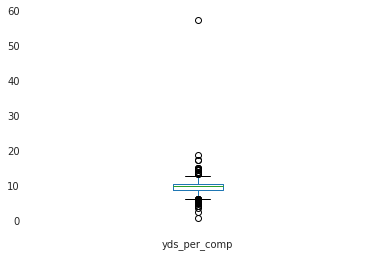

In [20]:
# Add Box Plots to further Describe the Data
# For DYAR_per_carry
df_p=df1.iloc[:,18]
df_p.plot.box()

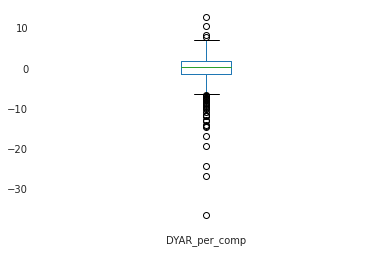

In [21]:
# Add Box Plots to further Describe the Data
# For Eyds_per_comp
df_p=df1.iloc[:,19]
df_p.plot.box()

In [22]:
# check to see if any missing data
display(df1.isna().sum())

Player_num       0
player           0
team             0
YAR              0
DVOA             0
VOA              0
QBR              0
pass             0
yards            0
Eyds             0
TD               0
FK               0
FL               0
INT              0
comp_perc        0
ALEX             0
year             0
completions      0
yds_per_comp     0
DYAR_per_comp    0
Eyds_per_comp    0
DYAR             0
dtype: int64

## Data Prep

In [23]:
# Subsetting the data to be used for modeling
display(df1.dtypes)
df1_list =  df1.columns
df1_list

Player_num         int64
player            object
team              object
YAR                int64
DVOA             float64
VOA              float64
QBR              float64
pass               int64
yards              int64
Eyds               int64
TD                 int64
FK                 int64
FL                 int64
INT                int64
comp_perc        float64
ALEX             float64
year               int64
completions        int64
yds_per_comp     float64
DYAR_per_comp    float64
Eyds_per_comp    float64
DYAR               int64
dtype: object

Index(['Player_num', 'player', 'team', 'YAR', 'DVOA', 'VOA', 'QBR', 'pass',
       'yards', 'Eyds', 'TD', 'FK', 'FL', 'INT', 'comp_perc', 'ALEX', 'year',
       'completions', 'yds_per_comp', 'DYAR_per_comp', 'Eyds_per_comp',
       'DYAR'],
      dtype='object')

In [24]:
df1_list = df1_list.drop(['DYAR'])

In [25]:
df1_list

Index(['Player_num', 'player', 'team', 'YAR', 'DVOA', 'VOA', 'QBR', 'pass',
       'yards', 'Eyds', 'TD', 'FK', 'FL', 'INT', 'comp_perc', 'ALEX', 'year',
       'completions', 'yds_per_comp', 'DYAR_per_comp', 'Eyds_per_comp'],
      dtype='object')

In [26]:
# # Encode DYAR before splitting the data to allow for modeling

# from sklearn.preprocessing import LabelEncoder
# enc = LabelEncoder()
# df1['Total_Value'] = enc.fit_transform(df1['DYAR'])

In [27]:
# # Splitting the data in to X and y
features=['Player_num', 'player', 'team', 'YAR', 'DVOA', 'VOA', 'QBR', 'pass','yards', 'Eyds', 'TD', 'FK', 'FL', 'INT', 'comp_perc', 'ALEX', 'year','completions', 'yds_per_comp', 'DYAR_per_comp', 'Eyds_per_comp']
X=df1[features]
y=df1.DYAR

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=2019)


In [28]:
# print(X_train.shape)

In [29]:
# y_train

Normalization

In [30]:
X_col_list= X.columns.tolist()
X_col_list

['Player_num',
 'player',
 'team',
 'YAR',
 'DVOA',
 'VOA',
 'QBR',
 'pass',
 'yards',
 'Eyds',
 'TD',
 'FK',
 'FL',
 'INT',
 'comp_perc',
 'ALEX',
 'year',
 'completions',
 'yds_per_comp',
 'DYAR_per_comp',
 'Eyds_per_comp']

In [31]:
# Subset X between categorical and continuous features

X_continuous = ['Player_num','YAR','DVOA','VOA','QBR','pass','yards','Eyds','TD','FK','FL','INT','comp_perc','ALEX','year','completions','yds_per_comp','DYAR_per_comp','Eyds_per_comp']
X_categorical = ['player','team']
X_continuous_df = X.loc[:,X_continuous]
X_categorical_df = X.loc[:,X_categorical]

In [32]:
# Initially displaying the skewness of all attributes
skew_df = pd.DataFrame(X_continuous_df.skew())

#filter skew attributes by absolute values of 0.5
skew_over = skew_df[(skew_df > 0.5).any(axis=1)]
skew_under = skew_df[(skew_df < -0.5).any(axis=1)]
display(skew_over.index)
display(skew_under.index)
total_skew_df = pd.concat([skew_over, skew_under])

skew_cols = total_skew_df.index.tolist()

Index(['YAR', 'Eyds', 'TD', 'FK', 'FL', 'INT', 'yds_per_comp'], dtype='object')

Index(['DVOA', 'VOA', 'comp_perc', 'DYAR_per_comp', 'Eyds_per_comp'], dtype='object')

In [33]:
skew_cols

['YAR',
 'Eyds',
 'TD',
 'FK',
 'FL',
 'INT',
 'yds_per_comp',
 'DVOA',
 'VOA',
 'comp_perc',
 'DYAR_per_comp',
 'Eyds_per_comp']

In [35]:
# creating the list of cols to adjust for skewness

for i in skew_cols:
    X[i+'_skew'] = X[i]
    
    
cols_to_skew = X.iloc[:,-12:].columns

In [36]:
cols_to_skew

Index(['YAR_skew', 'Eyds_skew', 'TD_skew', 'FK_skew', 'FL_skew', 'INT_skew',
       'yds_per_comp_skew', 'DVOA_skew', 'VOA_skew', 'comp_perc_skew',
       'DYAR_per_comp_skew', 'Eyds_per_comp_skew'],
      dtype='object')

In [37]:
# Normalize using quantile_transform for columns that have skewness

from sklearn.preprocessing import quantile_transform
transformed_qt = quantile_transform(X[cols_to_skew],random_state=0,copy=True,n_quantiles=50)
transformed_qt_df = pd.DataFrame(transformed_qt,columns = cols_to_skew)
X[cols_to_skew] = transformed_qt_df[cols_to_skew]


In [38]:
display(X[cols_to_skew].skew())

YAR_skew              0.000075
Eyds_skew            -0.000799
TD_skew              -0.095696
FK_skew              -0.171125
FL_skew              -0.116529
INT_skew             -0.056457
yds_per_comp_skew    -0.003575
DVOA_skew            -0.001891
VOA_skew              0.000043
comp_perc_skew       -0.004282
DYAR_per_comp_skew    0.006604
Eyds_per_comp_skew   -0.009265
dtype: float64

In [39]:
# review data types to ensure all data is processed for modeling
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 33 columns):
Player_num            612 non-null int64
player                612 non-null object
team                  612 non-null object
YAR                   612 non-null int64
DVOA                  612 non-null float64
VOA                   612 non-null float64
QBR                   612 non-null float64
pass                  612 non-null int64
yards                 612 non-null int64
Eyds                  612 non-null int64
TD                    612 non-null int64
FK                    612 non-null int64
FL                    612 non-null int64
INT                   612 non-null int64
comp_perc             612 non-null float64
ALEX                  612 non-null float64
year                  612 non-null int64
completions           612 non-null int64
yds_per_comp          612 non-null float64
DYAR_per_comp         612 non-null float64
Eyds_per_comp         612 non-null float64
YAR_skew        

In [40]:
# Encode the categorical variables that remain bool or object for modeling

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
X['player'] = enc.fit_transform(X['player'])
X['team'] = enc.fit_transform(X['team'])

In [41]:
X[['player','team']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 2 columns):
player    612 non-null int64
team      612 non-null int64
dtypes: int64(2)
memory usage: 9.7 KB


In [45]:
col_list = X.columns

In [46]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 33 columns):
Player_num            612 non-null int64
player                612 non-null int64
team                  612 non-null int64
YAR                   612 non-null int64
DVOA                  612 non-null float64
VOA                   612 non-null float64
QBR                   612 non-null float64
pass                  612 non-null int64
yards                 612 non-null int64
Eyds                  612 non-null int64
TD                    612 non-null int64
FK                    612 non-null int64
FL                    612 non-null int64
INT                   612 non-null int64
comp_perc             612 non-null float64
ALEX                  612 non-null float64
year                  612 non-null int64
completions           612 non-null int64
yds_per_comp          612 non-null float64
DYAR_per_comp         612 non-null float64
Eyds_per_comp         612 non-null float64
YAR_skew          

In [47]:
# resplit based on additional data prep completed post initial split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3) 

In [48]:
#define new dataframe, df_Prepped, which contains all the features, as adjusted per the Data Preparation above, along with the target variables from the initial dataframe

df_Prepped = pd.concat([X,y],axis=1)

#check new dataframe, df_Prepped                
df_Prepped.head()



Player_num  player  team   YAR   DVOA    VOA   QBR  pass  yards  Eyds  ...  \
0           1       0     7    75 -0.086 -0.090  41.1   536   3061  2894  ...   
1           2       0     7   406  0.052  0.053  59.4   383   2405  2543  ...   
2           3       0     7   -63 -0.106 -0.129  40.1   558   3230  2934  ...   
3           4       0     7   667  0.076  0.058  52.3   605   3915  4165  ...   
4           5       0     7  1059  0.317  0.289  72.5   409   3103  3676  ...   

    FK_skew   FL_skew  INT_skew  yds_per_comp_skew  DVOA_skew  VOA_skew  \
0  0.000000  0.897959  0.775510           0.418367   0.488338  0.475160   
1  0.428571  0.000000  0.683673           0.612245   0.709594  0.709997   
2  0.428571  0.897959  0.867347           0.448980   0.448980  0.417724   
3  0.938776  0.663265  0.591837           0.581633   0.742967  0.717803   
4  0.622449  0.663265  0.551020           0.897959   0.949814  0.934905   

   comp_perc_skew  DYAR_per_comp_skew  Eyds_per_comp_skew  DYAR  
0        0.397959            0.489796            0.510204    87  
1        0.540816            0.714286            0.714286   404  
2        0.397959            0.459184            0.469388    19  
3        0.734694            0.744898            0.714286   738  
4        0.795918            0.946939            0.942857  1135  

[5 rows x 34 columns]

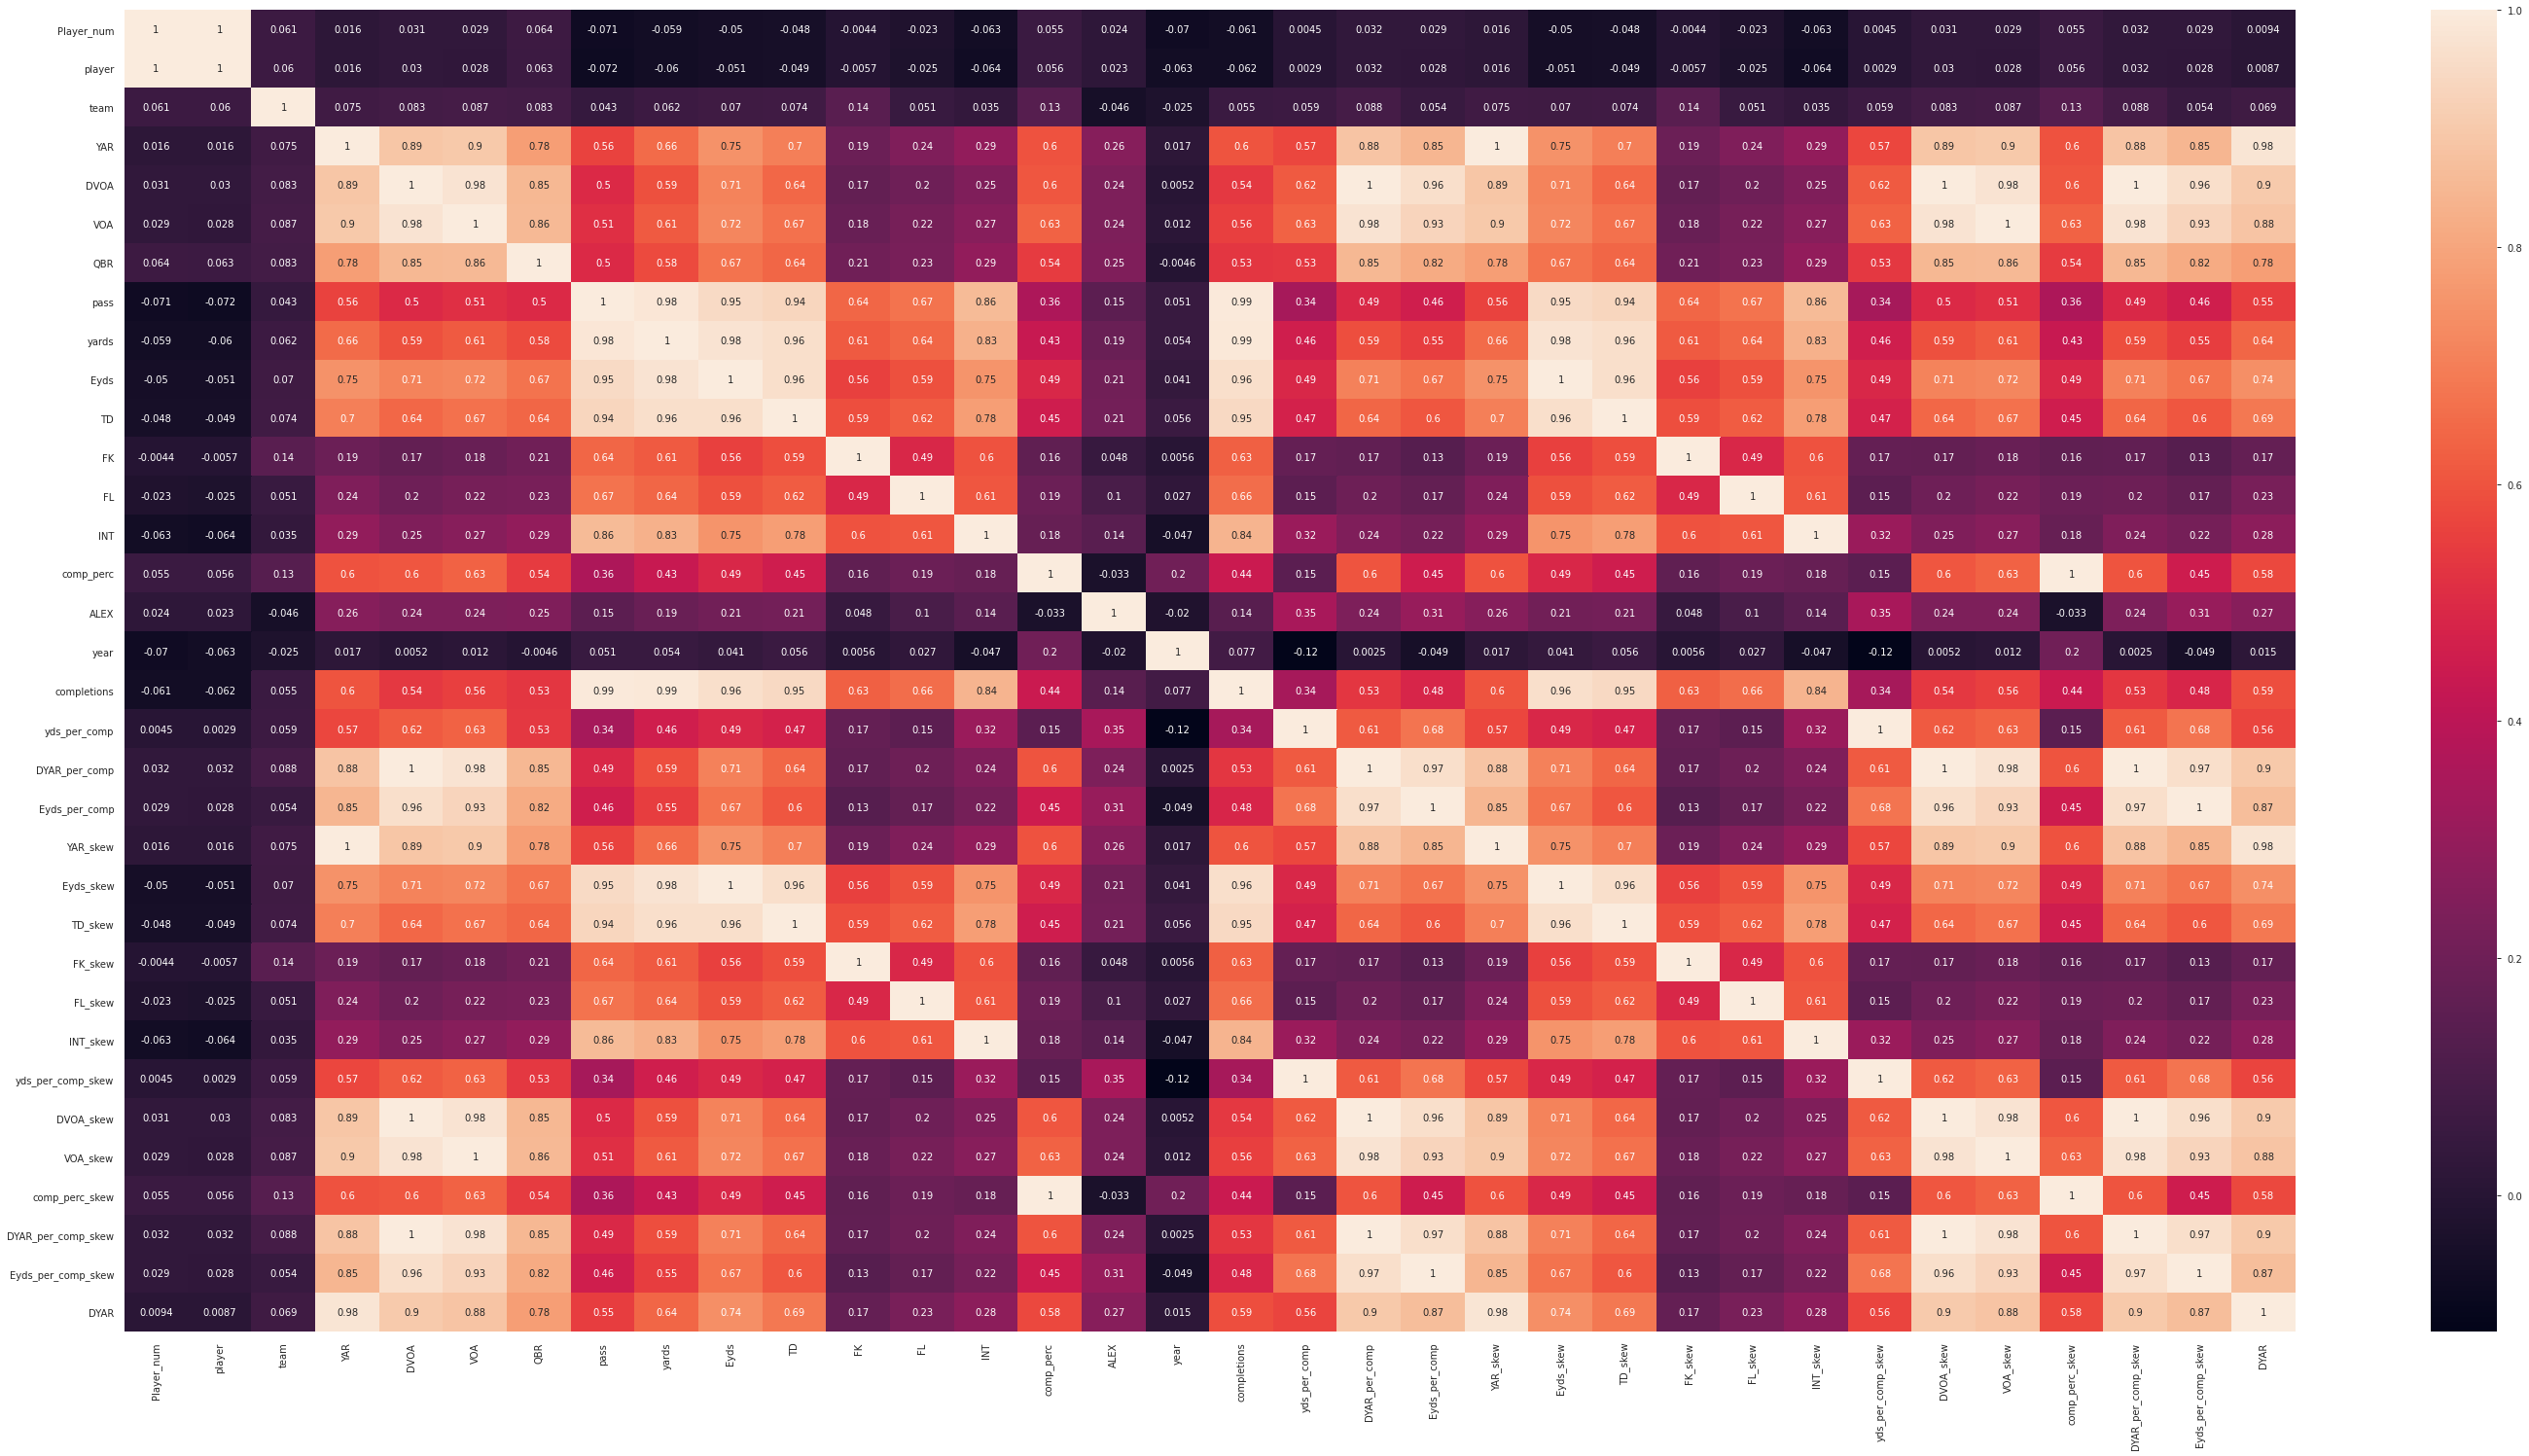

In [49]:
#Correlation Heatmap for the dataframe
spearman =df_Prepped.corr(method ='spearman')
plt.figure(figsize=(50,25))
sns.heatmap(spearman, annot=True)

In [50]:
corr_df = pd.DataFrame(X.corrwith(df_Prepped['DYAR']))

#filter skew attributes by absolute values of 0.5

corr_over = corr_df[(corr_df > 0.09).any(axis=1)]
corr_under = corr_df[(corr_df < -0.09).any(axis=1)]
display(corr_over.index)
display(corr_under.index)

corr_with_df = pd.concat([corr_over, corr_under])

model_cols = corr_with_df.index.tolist()
model_cols

Index(['YAR', 'DVOA', 'VOA', 'QBR', 'pass', 'yards', 'Eyds', 'TD', 'FK', 'FL',
       'INT', 'comp_perc', 'ALEX', 'completions', 'yds_per_comp',
       'DYAR_per_comp', 'Eyds_per_comp', 'YAR_skew', 'Eyds_skew', 'TD_skew',
       'FK_skew', 'FL_skew', 'INT_skew', 'yds_per_comp_skew', 'DVOA_skew',
       'VOA_skew', 'comp_perc_skew', 'DYAR_per_comp_skew',
       'Eyds_per_comp_skew'],
      dtype='object')

Index([], dtype='object')

['YAR',
 'DVOA',
 'VOA',
 'QBR',
 'pass',
 'yards',
 'Eyds',
 'TD',
 'FK',
 'FL',
 'INT',
 'comp_perc',
 'ALEX',
 'completions',
 'yds_per_comp',
 'DYAR_per_comp',
 'Eyds_per_comp',
 'YAR_skew',
 'Eyds_skew',
 'TD_skew',
 'FK_skew',
 'FL_skew',
 'INT_skew',
 'yds_per_comp_skew',
 'DVOA_skew',
 'VOA_skew',
 'comp_perc_skew',
 'DYAR_per_comp_skew',
 'Eyds_per_comp_skew']

In [95]:
# determined possible features list by removing corresponding, duplicative features that were not adjusted for skewness
 
possible_Features_list =['QBR',
 'pass',
'Eyds_skew',
 'TD_skew',
 'FK_skew',
'completions',
 'FL_skew',
 'INT_skew',
 'VOA_skew',
 'comp_perc_skew',
 'yds_per_comp_skew','DYAR']    


In [96]:
#Correlation Heatmap for the dataframe
possible_Corr_df = df_Prepped.loc[:,possible_Features_list]
possible_Corr_df


QBR  pass  Eyds_skew   TD_skew   FK_skew  completions   FL_skew  \
0    41.1   536   0.678716  0.816327  0.000000          323  0.897959   
1    59.4   383   0.635354  0.734694  0.428571          239  0.000000   
2    40.1   558   0.684191  0.612245  0.428571          337  0.897959   
3    52.3   605   0.869707  0.653061  0.938776          393  0.663265   
4    72.5   409   0.804802  0.836735  0.622449          270  0.663265   
..    ...   ...        ...       ...       ...          ...       ...   
607  40.3   122   0.327066  0.336735  0.622449           71  0.000000   
608  59.4   170   0.498165  0.510204  0.428571          101  0.816327   
609   2.5    58   0.081633  0.000000  0.000000           31  0.000000   
610  20.3   179   0.285714  0.336735  0.428571          110  0.663265   
611  33.7   197   0.370885  0.469388  0.622449          118  0.663265   

     INT_skew  VOA_skew  comp_perc_skew  yds_per_comp_skew  DYAR  
0    0.775510  0.475160        0.397959           0.418367    87  
1    0.683673  0.709997        0.540816           0.612245   404  
2    0.867347  0.417724        0.397959           0.448980    19  
3    0.591837  0.717803        0.734694           0.581633   738  
4    0.551020  0.934905        0.795918           0.897959  1135  
..        ...       ...             ...                ...   ...  
607  0.642857  0.343977        0.275510           0.925170   -83  
608  0.224490  0.896918        0.397959           0.908163   353  
609  0.306122  0.080526        0.142857           0.037744  -180  
610  0.551020  0.086824        0.540816           0.091837  -408  
611  0.551020  0.212603        0.397959           0.795918  -211  

[612 rows x 12 columns]

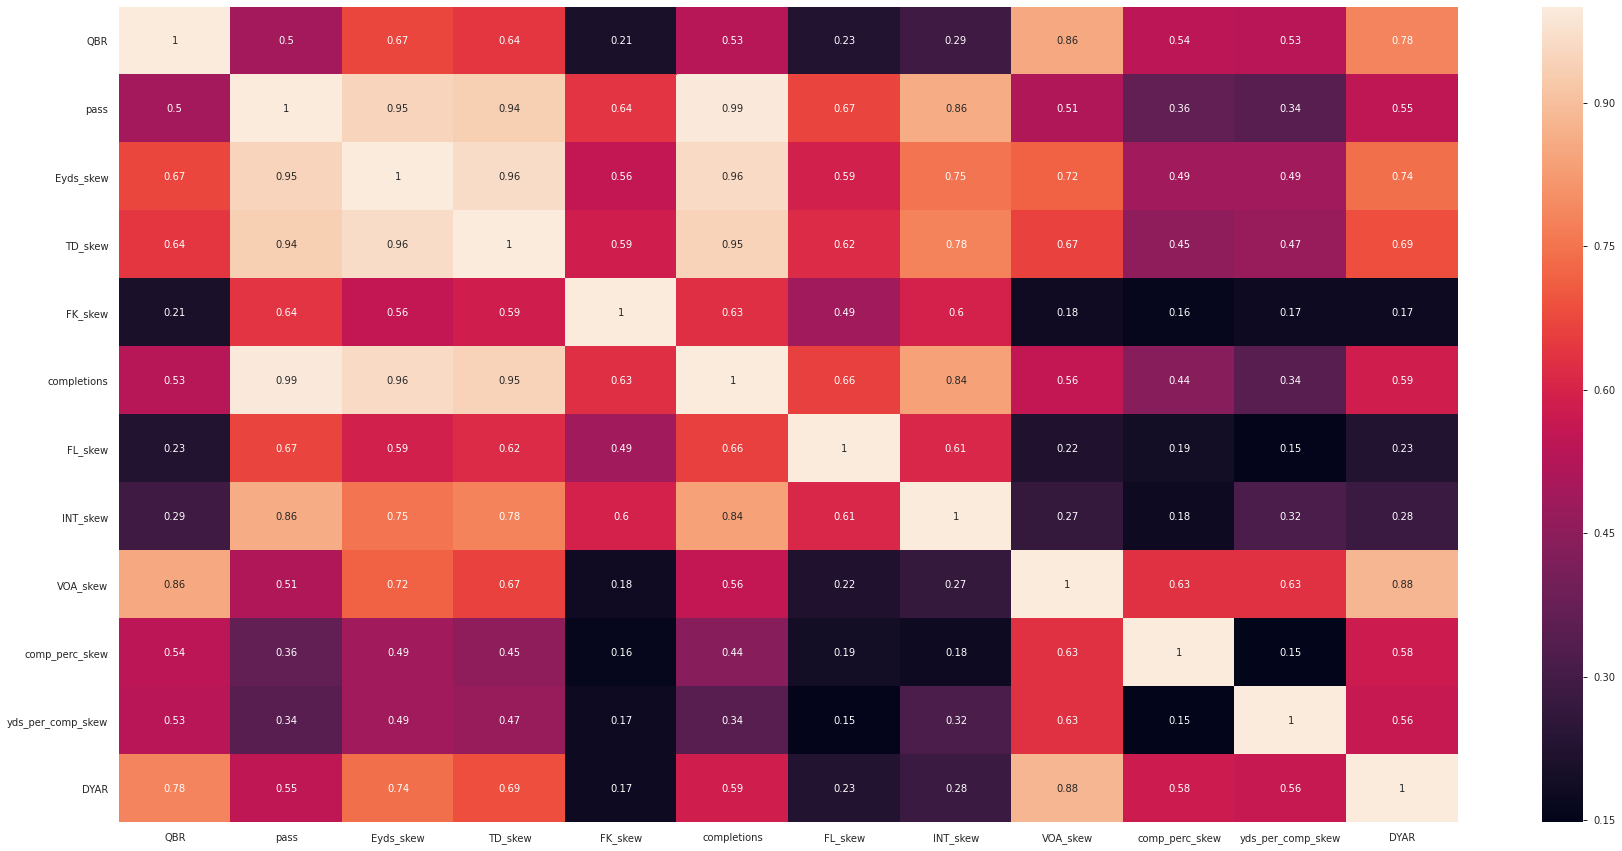

In [97]:
spearman_possible =possible_Corr_df.corr(method ='spearman')
plt.figure(figsize=(30,15))
sns.heatmap(spearman_possible, annot=True)

In [100]:
# Filtered out intercorrelated featues for feature importance
feature_importance_list = ['QBR',
 'pass',
'Eyds_skew',
 'TD_skew',
 'FK_skew',
'completions',
 'FL_skew',
 'INT_skew',
 'VOA_skew',
 'comp_perc_skew',
 'yds_per_comp_skew']



In [101]:
# # Split the df_Models dataset
X_Models,y_Models = possible_Corr_df.loc[:,feature_importance_list],possible_Corr_df.iloc[:,-1]

# Set the training at 30% (as above for baseline) given the modest size of the dataset (~12,000 observations)
X_Models_train, X_Models_test, y_Models_train, y_Models_test = train_test_split(X_Models, y_Models, test_size=0.3,random_state=500) 

#print out the first five rows of the training data
display(X_Models_train.head(),y_Models_train.head())

QBR  pass  Eyds_skew   TD_skew   FK_skew  completions   FL_skew  \
128  25.9   153   0.164776  0.224490  0.622449           99  0.816327   
291  47.4   100   0.273000  0.295918  0.622449           57  0.000000   
339  64.7    28   0.032502  0.000000  0.000000           15  0.000000   
95    4.9    42   0.229621  0.295918  0.000000           25  0.000000   
257  50.9   602   0.796298  0.897959  0.765306          397  0.979592   

     INT_skew  VOA_skew  comp_perc_skew  yds_per_comp_skew  
128  0.224490  0.088836        0.734694           0.028528  
291  0.306122  0.222509        0.224490           0.326531  
339  0.224490  0.035246        0.142857           0.047619  
95   0.224490  0.593526        0.326531           0.938776  
257  0.897959  0.593526        0.795918           0.275510

128   -458
291    -87
339   -131
95      21
257    398
Name: DYAR, dtype: int64

#### XGBoost Model

In [102]:
#Import Needed Packages
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Step 1: Specify the Model

In [103]:
#Instantiate an XGBoost Classifer Model - for Total_Value
XGB_class = xgb.XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 50)


Steps 2-4: Generate Test Data, Build the Models & Assess the Models for Total_Value

In [104]:
#Put Data into structure for XGBoost- for Total_Value 
data_dmatrix = xgb.DMatrix(data=X_Models,label=y_Models)

#Train the model using the training sets for Total_Value
XGB_class.fit(X_Models_train, y_Models_train)

#Predict the response for test dataset for Total_Value
y_XGB_pred = XGB_class.predict(X_Models_test)

#Calculate RMSE for Total_Value
rmse_XGB = np.sqrt(mean_squared_error(y_Models_test, y_XGB_pred))
print("XGBoost's RMSE for Total_Value is: %f" % (rmse_XGB))

#Create error ratio to evaluate results for Total_Value
target_range_XGB = y_Models.max() - y_Models.min()
print("XGB target range is: %f" % (target_range_XGB))
error_ratio_XGB = rmse_XGB/target_range_XGB
print("XGBoost's Error Ratio for Total_Value is: %f" % (error_ratio_XGB))

/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/tljh/user/lib/python3.6/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBoost's RMSE for Total_Value is: 247.055035
XGB target range is: 3620.000000
XGBoost's Error Ratio for Total_Value is: 0.068247


#### Regression Model

In [105]:
# Code for feature selection using scikit-learn
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100,max_depth=2, random_state=0)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_Models_train,y_Models_train)

feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

9     0.132637
10    0.125695
0     0.111769
2     0.101113
1     0.098874
5     0.087984
3     0.083253
8     0.073141
7     0.071625
4     0.065726
6     0.048184
dtype: float64

In [106]:
X_Models_train.iloc[:,[9,10,0,2,1,5,3,8,7,4,6]].head()

comp_perc_skew  yds_per_comp_skew   QBR  Eyds_skew  pass  completions  \
128        0.734694           0.028528  25.9   0.164776   153           99   
291        0.224490           0.326531  47.4   0.273000   100           57   
339        0.142857           0.047619  64.7   0.032502    28           15   
95         0.326531           0.938776   4.9   0.229621    42           25   
257        0.795918           0.275510  50.9   0.796298   602          397   

      TD_skew  VOA_skew  INT_skew   FK_skew   FL_skew  
128  0.224490  0.088836  0.224490  0.622449  0.816327  
291  0.295918  0.222509  0.306122  0.622449  0.000000  
339  0.000000  0.035246  0.224490  0.000000  0.000000  
95   0.295918  0.593526  0.224490  0.000000  0.000000  
257  0.897959  0.593526  0.897959  0.765306  0.979592

In [107]:
import statsmodels.api as sm

features=['comp_perc_skew','yds_per_comp_skew','QBR','Eyds_skew','pass','completions','TD_skew','VOA_skew','INT_skew','FK_skew','FL_skew']
X_imp=possible_Corr_df[features]
y_imp=possible_Corr_df.DYAR

X_train_feat,X_test_feat,y_train_feat,y_test_feat=train_test_split(X_imp,y_imp,test_size=0.25,random_state=2019)

model = sm.OLS(y_train_feat, X_train_feat).fit()
predictions = model.predict(X_Models_train)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   DYAR   R-squared (uncentered):                   0.883
Model:                            OLS   Adj. R-squared (uncentered):              0.880
Method:                 Least Squares   F-statistic:                              307.8
Date:                Mon, 22 Jun 2020   Prob (F-statistic):                   6.27e-201
Time:                        06:33:37   Log-Likelihood:                         -3083.5
No. Observations:                 459   AIC:                                      6189.
Df Residuals:                     448   BIC:                                      6234.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
comp_perc_skew     -492.5804     54.788     -8.991      0.000    -600.253    -384.908
yds_per_comp_skew   277.9957     49.440      5.623      0.000     180.833     375.159
QBR                  -2.7419      0.819     -3.349      0.001      -4.351      -1.133
Eyds_skew          1464.1154    201.246      7.275      0.000    1068.611    1859.620
pass                -10.7721      0.610    -17.645      0.000     -11.972      -9.572
completions          17.5403      0.880     19.934      0.000      15.811      19.270
TD_skew             217.5227    122.710      1.773      0.077     -23.635     458.681
VOA_skew            136.1948     96.141      1.417      0.157     -52.748     325.137
INT_skew           -746.6332     73.384    -10.174      0.000    -890.853    -602.413
FK_skew            -150.4917     39.211     -3.838      0.000    -227.552     -73.431
FL_skew            -137.5889     36.962     -3.722      0.000    -210.229     -64.949
==============================================================================
Omnibus:                       60.944   Durbin-Watson:                   1.818
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.750
Skew:                           0.669   Prob(JB):                     4.11e-34
Kurtosis:                       5.500   Cond. No.                     1.00e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""